In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Project Titanic: Classification

In [2]:
df = pd.read_csv('/Users/braulio/Documents/data/train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Train-test-split

In [3]:
# Select X and y
X = df.drop(columns = ['Survived'])
y = df['Survived']


# Split the dataframe into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y) 

# Syntax: train_test_split(X <-- df, y <--series)

### Baseline Model

In [4]:
dummy_cols = ['Pclass', 'Age']

X_dummy_train = X_train[dummy_cols]
X_dummy_test = X_test[dummy_cols]

In [5]:
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_dummy_train, y_train)
ypred_baseline = baseline.predict(X_dummy_train)

In [6]:
baseline.score(X_dummy_train, y_train)
# Training data accuracy:

0.6167664670658682

## Explore data/ Feature Engineering

In [7]:
# Treat X_train as main df

X_train.isna().sum()

Pclass        0
Name          0
Sex           0
Age         139
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       515
Embarked      1
dtype: int64

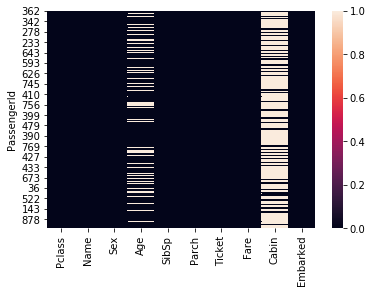

In [8]:
sns.heatmap(X_train.isna())

### Fix missing values on dataset

### Missing Age values

In [9]:
# Exploring age avgs by sub-categories:

round(X_train['Age'].mean(), 2), X_train['Age'].median()

(29.56, 28.0)

In [10]:
X_train[X_train["Pclass"]==1]["Age"].mean()

37.76014285714286

In [11]:
X_train[X_train["Pclass"]==2]["Age"].mean()

30.48

In [12]:
X_train[X_train["Pclass"]==3]["Age"].mean()

24.77431818181818

In [13]:
X_train[X_train["Sex"]=='male']["Age"].mean()

30.72174174174174

In [14]:
X_train[X_train["Sex"]=='female']["Age"].mean()

27.584183673469386

In [15]:
# imputation

X_train.groupby('Pclass').transform('mean')['Age']

PassengerId
362    30.480000
355    24.774318
290    24.774318
431    37.760143
285    37.760143
         ...    
521    37.760143
68     24.774318
650    24.774318
270    37.760143
814    24.774318
Name: Age, Length: 668, dtype: float64

In [16]:
X_train['Age'].fillna(X_train.groupby('Pclass').transform('mean')['Age'], inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
X_train.isna().sum()

# Nan Age values imputed:

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       515
Embarked      1
dtype: int64

### Missing Embarked Values

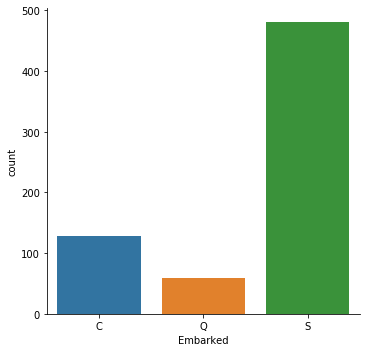

In [18]:
sns.catplot(x = 'Embarked', kind = 'count', data = X_train)

In [19]:
X_train['Embarked'] = X_train['Embarked'].fillna('S')
X_train.isna().sum()

# Nan Embarked values imputed:

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       515
Embarked      0
dtype: int64

### Missing Cabin values

In [20]:
X_train['Cabin'].unique()

array([nan, 'C52', 'A19', 'B96 B98', 'C22 C26', 'B77', 'D21', 'E121',
       'C23 C25 C27', 'C65', 'A26', 'C125', 'B22', 'B5', 'B69', 'C45',
       'D30', 'A16', 'D10 D12', 'C106', 'E67', 'E68', 'B39', 'C126',
       'B82 B84', 'C2', 'A10', 'A20', 'F G73', 'D19', 'E33', 'D7', 'D',
       'C110', 'G6', 'E25', 'D17', 'A36', 'B86', 'E31', 'D50', 'D6',
       'A31', 'B30', 'C78', 'F4', 'C7', 'B4', 'C62 C64', 'E101', 'B38',
       'B79', 'C124', 'E58', 'D49', 'A32', 'F2', 'D33', 'F E69', 'E38',
       'B58 B60', 'C148', 'C85', 'D26', 'B49', 'E24', 'T', 'D37', 'F33',
       'C30', 'B18', 'C86', 'D20', 'E36', 'C123', 'B41', 'E50', 'D9',
       'E8', 'E44', 'D36', 'E46', 'E34', 'A7', 'E10', 'B19', 'C47', 'C46',
       'B102', 'D47', 'B28', 'C104', 'B57 B59 B63 B66', 'E77', 'E40',
       'C49', 'A6', 'B42', 'F38', 'E17', 'D45', 'C95', 'B78', 'C91', 'A5',
       'C83', 'B51 B53 B55', 'C93', 'D11', 'F G63', 'B35', 'A34', 'C82',
       'B20', 'D15', 'B101', 'B37', 'C50', 'B73', 'C99'], dtype=objec

In [21]:
X_train['Cabin'] = X_train['Cabin'].fillna('missing')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
X_train['Cabin'] = X_train['Cabin'].str[0]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
X_train['Cabin'].unique()

array(['m', 'C', 'A', 'B', 'D', 'E', 'F', 'G', 'T'], dtype=object)

In [24]:
X_train['Cabin'].value_counts()

m    515
C     39
B     37
E     26
D     26
A     12
F      9
G      3
T      1
Name: Cabin, dtype: int64

In [25]:
X_train.isna().sum()

# Nan Cabin values imputed:

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Normalizing Fare

In [26]:
X_train['Fare'].min(), X_train['Fare'].max()

(0.0, 512.3292)

In [27]:
scaler = MinMaxScaler()
scaler.fit(X_train[['Fare']])

X_train['Fare'] = scaler.transform(X_train[['Fare']])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
X_train['Fare'].min(), X_train['Fare'].max()

(0.0, 1.0)

### Drop Unwanted Columns 

In [29]:
X_train = X_train.drop(['Name', 'Ticket'], axis = 1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
362,2,male,29.000000,1,0,0.054107,m,C
355,3,male,24.774318,0,0,0.014102,m,C
290,3,female,22.000000,0,0,0.015127,m,Q
431,1,male,28.000000,0,0,0.051822,C,S
285,1,male,37.760143,0,0,0.050749,A,S


### Sex, and other string categories into binary

In [30]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_m,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
362,2,29.000000,1,0,0.054107,1,0,0,0,0,0,0,0,1,0,0
355,3,24.774318,0,0,0.014102,1,0,0,0,0,0,0,0,1,0,0
290,3,22.000000,0,0,0.015127,0,0,0,0,0,0,0,0,1,1,0
431,1,28.000000,0,0,0.051822,1,0,1,0,0,0,0,0,0,0,1
285,1,37.760143,0,0,0.050749,1,0,0,0,0,0,0,0,0,0,1


## Train Model

#### Build a dummy classifier

In [31]:
# strategy='most_frequent' creates a model that always predicts the majority class
m_dummy = DummyClassifier(strategy='most_frequent', random_state=10)

In [32]:
m_dummy.fit(X_train, y_train)

DummyClassifier(random_state=10, strategy='most_frequent')

#### Build a Logistic Regression model

In [33]:
# Create a model
m = LogisticRegression()

In [34]:
# Train a model
m.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [35]:
# create predicted values
ypred = m.predict(X_train)

In [36]:
accuracy_score(ypred, y_train)
# Accuracy on adjusted model

0.8188622754491018

Accuracy is significantly better!

## Performance evaluations and Cross-Validation score

### Confusion Matrix

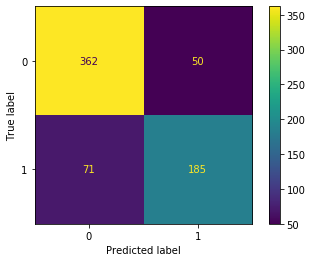

In [37]:
plot_confusion_matrix(m, X_train, y_train)

In [39]:
print('Accuracy: ' + str(m.score(X_train, y_train))), 
print('Precision: ' + str(precision_score(y_train, ypred))),
print('Recall: ' + str(recall_score(y_train, ypred))),
print('F1 score: ' + str(recall_score(y_train, ypred)))

Accuracy: 0.8188622754491018
Precision: 0.7872340425531915
Recall: 0.72265625
F1 score: 0.72265625


### Cross-Validation

In [40]:
accuracy = cross_val_score(m, X_train, ypred, cv=5, scoring='accuracy')
print("Cross-validation scores: ", accuracy)

Cross-validation scores:  [0.98507463 0.96268657 0.99253731 0.9924812  0.96992481]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

## Random Forest classification model

In [41]:
RandomF = RandomForestClassifier(n_estimators = 100, max_depth = 3)
RandomF.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [42]:
ypred_RandomF = RandomF.predict(X_train)

In [43]:
print('Accuracy: ' + str(RandomF.score(X_train, y_train))), 
print('Precision: ' + str(precision_score(y_train, ypred_RandomF))),
print('Recall: ' + str(recall_score(y_train, ypred_RandomF))),
print('F1 score: ' + str(recall_score(y_train, ypred_RandomF)))

Accuracy: 0.8368263473053892
Precision: 0.855072463768116
Recall: 0.69140625
F1 score: 0.69140625


In [44]:
accuracy = cross_val_score(m, X_train, ypred_RandomF, cv=5, scoring='accuracy')
print("Cross-validation scores: ", accuracy)

Cross-validation scores:  [0.92537313 0.94776119 0.94776119 0.93233083 0.93984962]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

# THE END!!!